# remove /n

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt




np.random.seed(2)


In [2]:
dataset = pd.read_csv(r'C:\Users\Naman Bhoj\Desktop\Feb-April\in process 2021\cicn 1 tripathi\webmd.csv')

# disease classification system which classifies more than 25 classes of disease using patient comment 

# in the other class add " change of life" sign and other classes below joint damage causing pain in loss and function

In [3]:
dataset['Condition'].value_counts().head(27)

Other                                                        49765
Pain                                                         25232
High Blood Pressure                                          23275
Depression                                                   14509
Birth Control                                                12253
Neuropathic Pain                                              8988
Type 2 Diabetes Mellitus                                      7648
Chronic Trouble Sleeping                                      7408
Attention Deficit Disorder with Hyperactivity                 6801
Bipolar Depression                                            5946
Migraine Prevention                                           4988
Panic Disorder                                                4867
Major Depressive Disorder                                     4256
Repeated Episodes of Anxiety                                  4138
Rheumatoid Arthritis                                          

In [4]:
#create two list one with all value and one with values you want to change and then iterate and if the value is what you dont want o change thenm move to next value

In [5]:
classiwant = [
'Pain',                                                         
'High Blood Pressure',                                          
'Depression',                                                   
'Birth Control',                                               
'Neuropathic Pain',                                              
'Type 2 Diabetes Mellitus',                                     
'Chronic Trouble Sleeping',                                      
'Attention Deficit Disorder with Hyperactivity',                
'Bipolar Depression',                                            
'Migraine Prevention',                                           
'Panic Disorder',                                                
'Major Depressive Disorder',                                    
'Repeated Episodes of Anxiety',                                  
'Rheumatoid Arthritis',                                          
'Overweight',                                                    
'High Cholesterol',                                              
'Disorder characterized by Stiff, Tender & Painful Muscles',     
'Underactive Thyroid',                                           
'Migraine Headache',                                             
'Anxious',                                                       
'Chronic Pain',                                                  
'Cough',                                                         
'Asthma',                                                                                         
'Acne',                                                          
'Joint Damage causing Pain and Loss of Function']

In [6]:
dataset['Condition'][0] 


'Stuffy Nose'

# Succesfully change all the other class other than the top 25 to "Other"

In [7]:
for i in range (0,len(dataset)):
    if (dataset['Condition'][i] not in classiwant):
        dataset['Condition'][i] = 'Other'
    

<ipython-input-7-5268fe1ba8c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Condition'][i] = 'Other'


In [8]:
len(dataset['Condition'].value_counts())


26

In [9]:
index_names = dataset[ dataset['Condition'] == 'Other' ].index

In [10]:
dataset.drop(index_names, inplace = True)

In [11]:
dataset = dataset.drop(['Age','Date','Drug','Sides'],axis = 1)

In [12]:
dataset

,Condition,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount
6,Birth Control,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,0
8,Acne,163180,4,2,,2,Female,1
11,Birth Control,164750,5,5,Taking Lyza made me break out HORRIBLY. I trie...,2,,0
12,Birth Control,164750,2,1,This stuff needs to be removed from the market...,1,Female,0
13,Birth Control,164750,2,3,"I usually have zero to little acne, a few mont...",1,Female,0
...,...,...,...,...,...,...,...,...
361701,Birth Control,163265,4,4,I haven't had many problems with this drug and...,3,Female,0
361703,Birth Control,163265,3,4,As per the previous review my hair has been sh...,1,Female,0
361704,Birth Control,163265,1,1,My hair started falling off. Even after stoppi...,1,Female,0
361705,Birth Control,163265,1,3,I personally had terrible side effects using t...,2,Female,3


In [13]:
dataset.isnull().sum()

Condition         0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          17
Satisfaction      0
Sex               0
UsefulCount       0
dtype: int64

In [14]:
 dataset = dataset.dropna()

In [15]:
dataset.isnull().sum()

Condition        0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
UsefulCount      0
dtype: int64

In [16]:
x_data = dataset.drop(['Condition'],axis = 1)
y_data = dataset['Condition']

In [17]:
y_data

6         Birth Control
8                  Acne
11        Birth Control
12        Birth Control
13        Birth Control
              ...      
361701    Birth Control
361703    Birth Control
361704    Birth Control
361705    Birth Control
361707    Birth Control
Name: Condition, Length: 167509, dtype: object

In [18]:

x_data.isnull().sum()

DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
UsefulCount      0
dtype: int64

# remove null values

In [19]:
# x_data = x_data.dropna()

In [20]:
# x_data.isnull().sum()

In [21]:
print(x_data["Sex"].value_counts())


Female    111814
Male       44406
           11289
Name: Sex, dtype: int64


# sex has missing value, we wil drop sex for now and in future scope add that you find relationship between sex and conditions

In [22]:
x_data.drop(['Sex'],axis =1 , inplace = True)

In [23]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

x_data["Satisfaction"] = x_data["Satisfaction"].apply(relabel)

# 1 and 2 means negative 3 means neutral  and 4,5,6 means positive

In [24]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167509 entries, 6 to 361707
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   DrugId         167509 non-null  int64 
 1   EaseofUse      167509 non-null  int64 
 2   Effectiveness  167509 non-null  int64 
 3   Reviews        167509 non-null  object
 4   Satisfaction   167509 non-null  int64 
 5   UsefulCount    167509 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 8.9+ MB


In [25]:
x_data['EaseofUse'].value_counts()

5    94119
4    35878
3    18053
1    12294
2     7163
6        2
Name: EaseofUse, dtype: int64

# doing the same for ease of use where 1,2 are 0 and 3 is neutral and greater than three is positive

In [26]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

x_data["EaseofUse"] = x_data["EaseofUse"].apply(relabel)

# now we will preprocess text from here

In [27]:
x_data

,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,UsefulCount
6,163180,2,5,Haven't gotten pregnant so it does it's job. I...,0,0
8,163180,2,2,,0,1
11,164750,2,5,Taking Lyza made me break out HORRIBLY. I trie...,0,0
12,164750,0,1,This stuff needs to be removed from the market...,0,0
13,164750,0,3,"I usually have zero to little acne, a few mont...",0,0
...,...,...,...,...,...,...
361701,163265,2,4,I haven't had many problems with this drug and...,1,0
361703,163265,1,4,As per the previous review my hair has been sh...,0,0
361704,163265,0,1,My hair started falling off. Even after stoppi...,0,0
361705,163265,0,3,I personally had terrible side effects using t...,0,3


In [28]:
x_data_text = x_data[['Reviews']]

In [29]:
x_data_text

,Reviews
6,Haven't gotten pregnant so it does it's job. I...
8,
11,Taking Lyza made me break out HORRIBLY. I trie...
12,This stuff needs to be removed from the market...
13,"I usually have zero to little acne, a few mont..."
...,...
361701,I haven't had many problems with this drug and...
361703,As per the previous review my hair has been sh...
361704,My hair started falling off. Even after stoppi...
361705,I personally had terrible side effects using t...


In [30]:
x_data_text["Reviews"] = x_data_text["Reviews"].str.lower()
x_data_text.head()

<ipython-input-30-f2a934661742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data_text["Reviews"] = x_data_text["Reviews"].str.lower()


,Reviews
6,haven't gotten pregnant so it does it's job. i...
8,
11,taking lyza made me break out horribly. i trie...
12,this stuff needs to be removed from the market...
13,"i usually have zero to little acne, a few mont..."


# see code below you also need to remove \n

In [31]:
x_data_text['Reviews'].iloc[2]

'taking lyza made me break out horribly. i tried it out for 3 months and then it was so bad that i stopped taking it. itâ??s inceedible how much it damaged my skin in only 3 months. now itâ??s been 3 months since i stopped taking it and my skin is way better but i still have acne and i have really bad scars. i definitely would not take this again. besides the acne, while taking lyza i started to not get me periods anymore starting about the 3rd month. everything else was fine. it didnâ??t give me mood swings or anything like that. '

In [32]:
x_data_text['Reviews'].iloc[12]

"my ob/gyn placed me on this pill because i was at risk for a stroke while being on estrogen birth controls. i have been taking this medication for 2 months with no side effects: migraines have stopped, no acne, no mood swings, no weight gain, no spotting, and sex drive is still intact. the first month of taking this pill my period was extremely light (almost nonexistant) and lasted only two days. this month i didn't have a period and took a pregnancy test, it was negative. i read reviews that this is normal while taking this pill... not sure if i like this factor? all in all, i'm pretty pleased with this birth control. please note that this is a progestin only pill and it is important to take at it at the same time daily."

 # removing \n

In [33]:
# import re
# for i in range(0, len(x_data_text)):
#     stringstore = x_data_text['Reviews'].iloc[i] 
#     stringstore = re.sub('(?:\s)\n[^, ]*', '', stringstore)
    
#     x_data['Reviews'].iloc[i] = stringstore

In [34]:
# x_data_text['Reviews'].iloc[12]

# remove punctuations

In [35]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

x_data_text["Reviews"] = x_data_text["Reviews"].apply(lambda text: remove_punctuation(text))
x_data_text.head()

<ipython-input-35-49a1e36c3379>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data_text["Reviews"] = x_data_text["Reviews"].apply(lambda text: remove_punctuation(text))


,Reviews
6,havent gotten pregnant so it does its job i wa...
8,
11,taking lyza made me break out horribly i tried...
12,this stuff needs to be removed from the market...
13,i usually have zero to little acne a few month...


# removing stopwords

In [36]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

x_data_text["Reviews"] = x_data_text["Reviews"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to C:\Users\Naman
[nltk_data]     Bhoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-36-a60092f9d85e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data_text["Reviews"] = x_data_text["Reviews"].apply(lambda text: remove_stopwords(text))


# lemmatization

In [37]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

x_data_text["Reviews"] = x_data_text["Reviews"].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to C:\Users\Naman
[nltk_data]     Bhoj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-37-d3191f2d271a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data_text["Reviews"] = x_data_text["Reviews"].apply(lambda text: lemmatize_words(text))


In [38]:
x_data_text

,Reviews
6,havent gotten pregnant job switched brand anot...
8,
11,taking lyza made break horribly tried 3 month ...
12,stuff need removed market it’s harmful age fas...
13,usually zero little acne month taking medicati...
...,...
361701,havent many problem drug period last 4 day nic...
361703,per previous review hair shedding ridiculously...
361704,hair started falling even stopping using month...
361705,personally terrible side effect using product ...


In [39]:
x_data_text['Reviews'].iloc[12]

'obgyn placed pill risk stroke estrogen birth control taking medication 2 month side effect migraine stopped acne mood swing weight gain spotting sex drive still intact first month taking pill period extremely light almost nonexistant lasted two day month didnt period took pregnancy test negative read review normal taking pill sure like factor im pretty pleased birth control please note progestin pill important take time daily'

# common words in negative reviews to be done after text preprocessing

In [40]:
from wordcloud import WordCloud

In [41]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

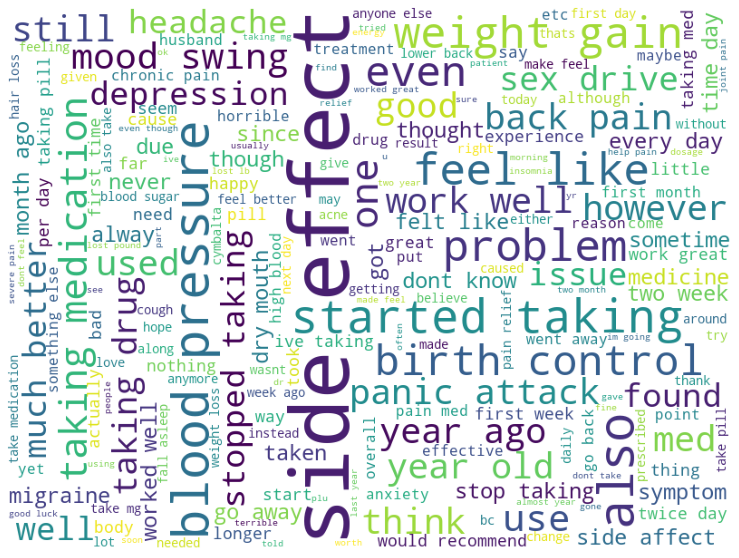

In [42]:
cloud(' '.join(x_data_text['Reviews']))

# tf-idf

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
import nltk

In [45]:
vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(1,1), min_df=10, max_df=0.8)


In [46]:
X_data_vectorize = vectorizer.fit_transform(x_data_text["Reviews"])



In [47]:
X_data_vectorize

<167509x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3046614 stored elements in Compressed Sparse Row format>

In [48]:
dataframe = pd.DataFrame(X_data_vectorize.toarray(), columns=vectorizer.get_feature_names())

In [49]:
dataframe

,10,100,100mg,10mg,11,12,13,14,15,150,...,xr,yaz,year,yes,yesterday,yet,youre,yr,zoloft,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# in this we will only consider textual features as 

In [50]:
dataframe.reset_index(drop=True, inplace=True)
x_data.reset_index(drop=True,inplace = True)

In [51]:
final_data = pd.concat([dataframe, x_data], axis=1)

In [52]:
final_data.drop(['Reviews'],axis = 1 , inplace = True)

# final data which consist of tfidf and other numerical features

In [53]:
final_data


,10,100,100mg,10mg,11,12,13,14,15,150,...,yet,youre,yr,zoloft,zombie,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,163180,2,5,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,163180,2,2,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,164750,2,5,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,164750,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,164750,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,163265,2,4,1,0
167505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,163265,1,4,0,0
167506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,163265,0,1,0,0
167507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,163265,0,3,0,3


# you could have also tried to normalise this data

In [54]:
from sklearn.model_selection import train_test_split, StratifiedKFold


In [55]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)

In [56]:
x_train,x_test , y_train,y_test = train_test_split(final_data, y_data, test_size = 0.2 , random_state = 2)

In [57]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

134007 33502 134007 33502


In [58]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()


In [59]:
x_train_s = ss.fit_transform(x_train)

x_test_s = ss.transform(x_test)

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [61]:
%%time
model = RandomForestClassifier( max_depth = 5, min_samples_split = 6)
model.fit(x_train_s, y_train)

Wall time: 11.4 s


RandomForestClassifier(max_depth=5, min_samples_split=6)

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer

In [63]:

predictions = model.predict(x_test_s)
acc_test = accuracy_score(y_test, predictions)
print(f"\nAccuracy in test  set: {acc_test:.4}\n")
print(classification_report(y_test, predictions, digits = 5))
confusion_matrix(y_test, predictions)
print(f1_score(y_test,predictions, average = 'weighted'))
print(recall_score(y_test,predictions, average = 'weighted'))
print(precision_score(y_test,predictions, average = 'weighted'))


Accuracy in test  set: 0.3309



C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                           precision    recall  f1-score   support

                                                     Acne    0.00000   0.00000   0.00000       504
                                                  Anxious    0.00000   0.00000   0.00000       645
                                                   Asthma    0.00000   0.00000   0.00000       509
            Attention Deficit Disorder with Hyperactivity    1.00000   0.09918   0.18046      1341
                                       Bipolar Depression    1.00000   0.00606   0.01205      1155
                                            Birth Control    0.81344   0.76284   0.78733      2492
                                             Chronic Pain    0.00000   0.00000   0.00000       621
                                 Chronic Trouble Sleeping    0.93805   0.07048   0.13111      1504
                                                    Cough    0.00000   0.00000   0.00000       510
         

C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.5)

In [66]:
%%time
ada.fit(x_train_s,y_train)

Wall time: 2min 57s


AdaBoostClassifier(learning_rate=0.5, n_estimators=100)

In [67]:

predictions_ada = ada.predict(x_test_s)
acc_test = accuracy_score(y_test, predictions_ada)
print(f"\nAccuracy in test  set: {acc_test:.4}\n")
print(classification_report(y_test, predictions_ada, digits = 5))
print(f1_score(y_test,predictions_ada,average = 'weighted'))
print(recall_score(y_test,predictions_ada,average = 'weighted'))
print(precision_score(y_test,predictions_ada,average = 'weighted'))


Accuracy in test  set: 0.4927

                                                           precision    recall  f1-score   support

                                                     Acne    0.88718   0.34325   0.49499       504
                                                  Anxious    0.40625   0.12093   0.18638       645
                                                   Asthma    0.98639   0.28487   0.44207       509
            Attention Deficit Disorder with Hyperactivity    0.36452   0.55779   0.44091      1341
                                       Bipolar Depression    0.81493   0.23636   0.36644      1155
                                            Birth Control    0.65469   0.78973   0.71590      2492
                                             Chronic Pain    0.21485   0.21900   0.21691       621
                                 Chronic Trouble Sleeping    0.71070   0.43285   0.53802      1504
                                                    Cough    0.86538   0.176

In [68]:
#ada n_estimators = 100 , learning_rate = 0.5 ----> 0.5852
# 0.48141673733260165
# 0.5851503707583318
# 0.5908865775192723

In [69]:
!pip install lightgbm

In [70]:
from lightgbm import LGBMClassifier

In [71]:
lgbm = LGBMClassifier(n_estimators = 150, learning_rate = 0.5)

In [72]:
%%time
lgbm.fit(x_train_s,y_train)

Wall time: 1min 48s


LGBMClassifier(learning_rate=0.5, n_estimators=150)

In [73]:

predictions_lgbm = lgbm.predict(x_test_s)
acc_test = accuracy_score(y_test, predictions_lgbm)
print(f"\nAccuracy in test  set: {acc_test:.4}\n")
print(classification_report(y_test, predictions_lgbm, digits = 5))
print(f1_score(y_test,predictions_lgbm,average = 'weighted'))
print(recall_score(y_test,predictions_lgbm,average = 'weighted'))
print(precision_score(y_test,predictions_lgbm,average = 'weighted'))


Accuracy in test  set: 0.1098



C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                           precision    recall  f1-score   support

                                                     Acne    0.00000   0.00000   0.00000       504
                                                  Anxious    0.00000   0.00000   0.00000       645
                                                   Asthma    0.00000   0.00000   0.00000       509
            Attention Deficit Disorder with Hyperactivity    0.00000   0.00000   0.00000      1341
                                       Bipolar Depression    0.00000   0.00000   0.00000      1155
                                            Birth Control    0.00000   0.00000   0.00000      2492
                                             Chronic Pain    0.00000   0.00000   0.00000       621
                                 Chronic Trouble Sleeping    1.00000   0.00066   0.00133      1504
                                                    Cough    0.00000   0.00000   0.00000       510
         

C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.ensemble import RandomForestClassifier



In [75]:
rf = RandomForestClassifier(n_estimators = 200)

In [76]:
%%time
rf.fit(x_train_s,y_train)

Wall time: 7min 2s


RandomForestClassifier(n_estimators=200)

In [77]:

predictions_rf = rf.predict(x_test_s)
acc_test = accuracy_score(y_test, predictions_rf)
print(f"\nAccuracy in test  set: {acc_test:.4}\n")
print(classification_report(y_test, predictions_rf, digits = 5))
print(f1_score(y_test,predictions_rf,average = 'weighted'))
print(recall_score(y_test,predictions_rf,average = 'weighted'))
print(precision_score(y_test,predictions_rf,average = 'weighted'))


Accuracy in test  set: 0.7843

                                                           precision    recall  f1-score   support

                                                     Acne    0.84500   0.67063   0.74779       504
                                                  Anxious    0.85853   0.68682   0.76314       645
                                                   Asthma    0.88500   0.69548   0.77888       509
            Attention Deficit Disorder with Hyperactivity    0.83818   0.83818   0.83818      1341
                                       Bipolar Depression    0.86347   0.60779   0.71341      1155
                                            Birth Control    0.82735   0.93459   0.87771      2492
                                             Chronic Pain    0.85551   0.36232   0.50905       621
                                 Chronic Trouble Sleeping    0.74014   0.87301   0.80110      1504
                                                    Cough    0.87586   0.747